In [1]:
from astropy.io import fits
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS
import matplotlib.pyplot as plt
import numpy as np
from astropy.visualization import make_lupton_rgb
import torch

import process
import acquire

In [103]:
tensor_img = torch.load("./img_tensor.pt")
tensor_gal = torch.load("./gal_tensor.pt")
tensor_sta = torch.load("./star_tensor.pt")

torch.Size([11, 1489, 2048, 5])


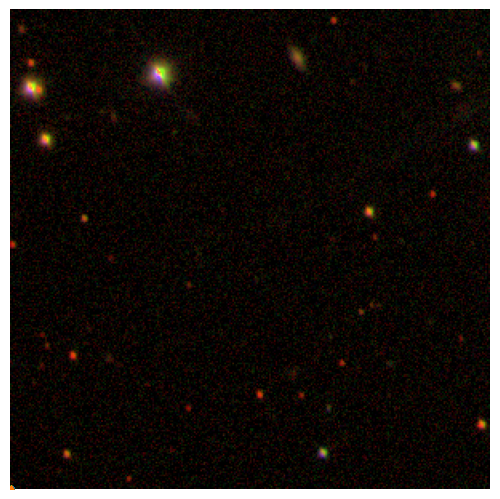

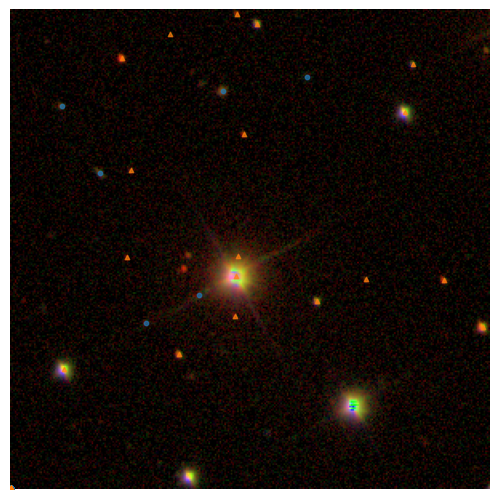

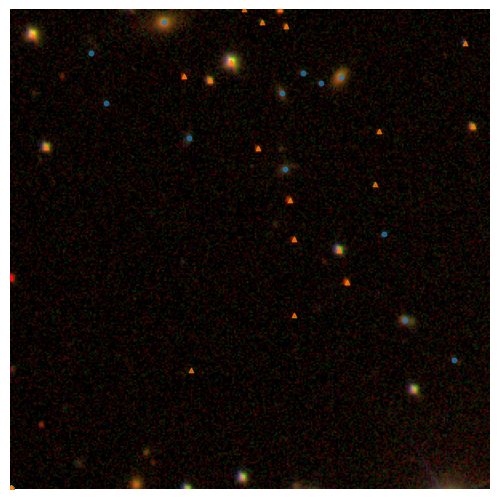

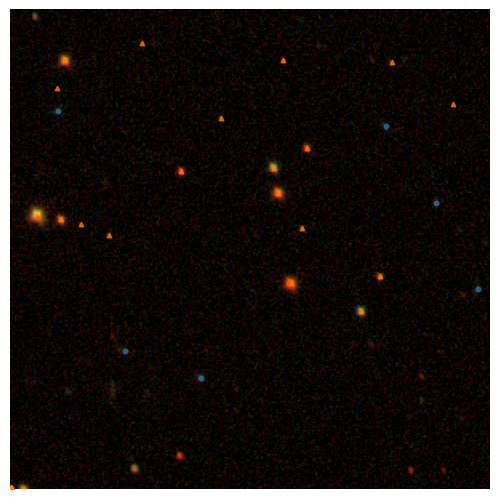

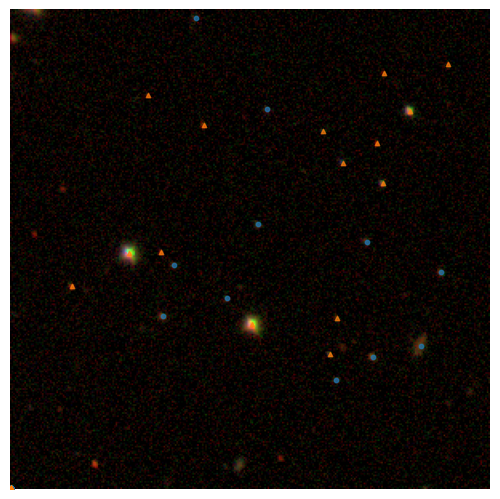

In [104]:
print(tensor_img.shape)

limit = 300

for i in range(0,5):
    selection_gal = torch.logical_and(tensor_gal[i,:,0]<limit,tensor_gal[i,:,1]<limit)
    selection_sta = torch.logical_and(tensor_sta[i,:,0]<limit,tensor_sta[i,:,1]<limit)

    process.create_rbg(tensor_img[i,:limit,:limit,0],tensor_img[i,:limit,:limit,1],tensor_img[i,:limit,:limit,2])
    plt.scatter(tensor_gal[i,:,0][selection_gal], tensor_gal[i,:,1][selection_gal], alpha=0.7, s=10, marker='o')
    plt.scatter(tensor_sta[i,:,0][selection_sta], tensor_sta[i,:,1][selection_sta], alpha=0.7, s=10, marker='^')


    # process.create_rbg(tensor_img[i,20:limit+20,20:limit+20,0],tensor_img[i,20:limit+20,20:limit+20,1],tensor_img[i,20:limit+20,20:limit+20,2])







tensor([1671,  130])
tensor([1194,  140])
tensor([], size=(0, 40))
tensor([], size=(0, 40))
tensor([], size=(0, 40))


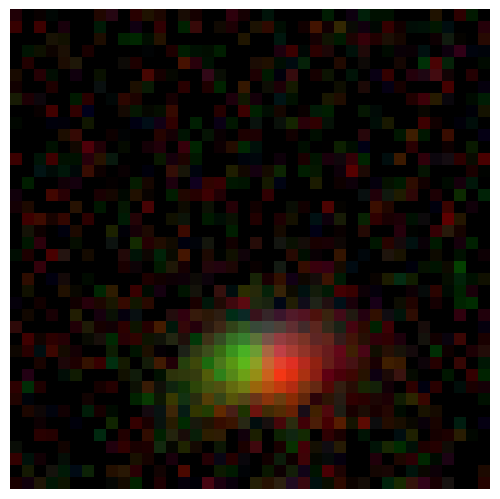

In [53]:


gal = tensor_gal[1,2].type(torch. int64) 
sta = tensor_sta[1,1].type(torch. int64) 

print(gal)
print(sta)


# print(tensor_img[1,sta[0]-20:sta[0]+20,sta[1]-20:sta[1]+20,0])
# print(tensor_img[1,sta[0]-20:sta[0]+20,sta[1]-20:sta[1]+20,1])
# print(tensor_img[1,sta[0]-20:sta[0]+20,sta[1]-20:sta[1]+20,2])

print(tensor_img[1,gal[0]-20:gal[0]+20,gal[1]-20:gal[1]+20,0])
print(tensor_img[1,gal[0]-20:gal[0]+20,gal[1]-20:gal[1]+20,1])
print(tensor_img[1,gal[0]-20:gal[0]+20,gal[1]-20:gal[1]+20,2])


process.create_rbg(tensor_img[1,sta[0]-20:sta[0]+20,sta[1]-20:sta[1]+20,0],tensor_img[1,sta[0]-20:sta[0]+20,sta[1]-20:sta[1]+20,1],tensor_img[1,sta[0]-20:sta[0]+20,sta[1]-20:sta[1]+20,2])

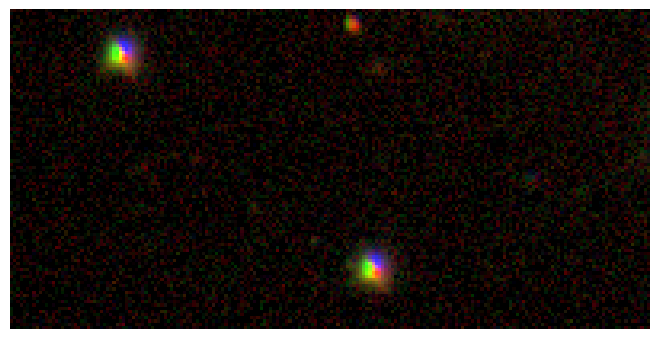

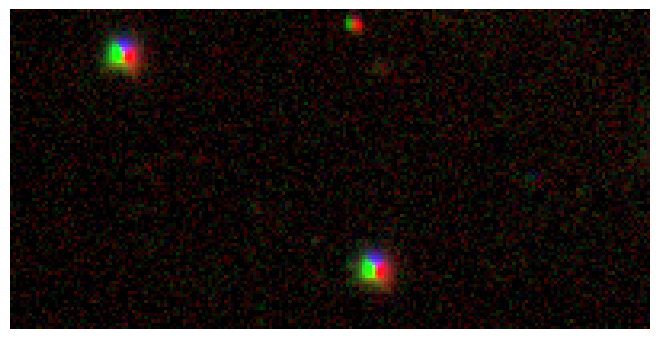

In [16]:

process.create_rbg(tensor_img[1,0:100,0:200,0],tensor_img[1,0:100,0:200,1],tensor_img[1,0:100,0:200,2])


In [124]:
def pad_array(array, shape):
    padding_array = np.zeros(shape)

    padding_array[:array.shape[0],:array.shape[1]] = array

    return padding_array

def create_tensor_from_coordinate(start_index, end_index, ref_band="g"):
    stars = fits.open('./data/calibObj-008162-6-star.fits', ext=0)
    gals = fits.open('./data/calibObj-008162-6-gal.fits', ext=0)

    stars_RA = np.array(stars[1].data.field('RA'))
    stars_DEC = np.array(stars[1].data.field('DEC'))
    stars_FIELD = np.array(stars[1].data.field('FIELD'))

    gals_RA = np.array(gals[1].data.field('RA'))
    gals_DEC = np.array(gals[1].data.field('DEC'))
    gals_FIELD = np.array(gals[1].data.field('FIELD'))

    data_stars = []
    data_gals = []

    max_shape_stars = (0,0)
    max_shape_gals = (0,0)


    for i in range(start_index,end_index+1):

        band = fits.open(f'./data/frame-{ref_band}-008162-6-0{i:03d}.fits', ext=0)
        wcs = WCS(band[0].header)

        x_star, y_star = wcs.all_world2pix(stars_RA[stars_FIELD==i], stars_DEC[stars_FIELD==i], 0)
        x_gal, y_gal = wcs.all_world2pix(gals_RA[gals_FIELD==i], gals_DEC[gals_FIELD==i], 0)

        coord_stars = np.stack([x_star, y_star], axis=1)
        coord_gals = np.stack([x_gal, y_gal], axis=1)

        if(max_shape_stars[0] < coord_stars.shape[0]):
            max_shape_stars = coord_stars.shape

        if(max_shape_gals[0] < coord_gals.shape[0]):
            max_shape_gals = coord_gals.shape

        data_stars.append(coord_stars)
        data_gals.append(coord_gals)



    data_stars = [pad_array(star, max_shape_stars) for star in data_stars]
    data_gals = [pad_array(gal, max_shape_gals) for gal in data_gals]


    print(np.stack(data_stars, axis=0).shape)
    print(np.stack(data_gals, axis=0).shape)

create_tensor_from_coordinate(90,95)


(6, 838, 2)
(6, 369, 2)


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


In [2]:
# g_band = fits.open('./data/frame-g-008162-6-0100.fits', ext=0)
# wcs = WCS(g_band[0].header)

# print(wcs)

# coord = SkyCoord(g_band[0].header['CRVAL1'], g_band[0].header['CRVAL2'], unit='deg')

# g_band.writeto('./data_test/frame-g-008162-6-0100.fits',overwrite=True)


# i_band = fits.open('./data/frame-i-008162-6-0100.fits', ext=0)
# coord = SkyCoord(i_band[0].header['CRVAL1'], i_band[0].header['CRVAL2'], unit='deg')

# x,y = wcs.world_to_pixel(coord)

# shift_x = int(x[()] - i_band[0].header['CRPIX1'])

# shift_y = int(y[()] - i_band[0].header['CRPIX2'])


# print(shift_x,shift_y)

# data = i_band[0].data

# print(data[0,0])

# data = np.roll(data, (shift_x,shift_y),axis=(1,0))

# print(data[0,0])


# i_band[0].data = data

# i_band.writeto('./data_test/frame-i-008162-6-0100.fits',overwrite=True)

# i_band.close()



# r_band = fits.open('./data/frame-r-008162-6-0100.fits', ext=0)
# coord = SkyCoord(r_band[0].header['CRVAL1'], r_band[0].header['CRVAL2'], unit='deg')

# x,y = wcs.world_to_pixel(coord)

# shift_x = int(x[()] - r_band[0].header['CRPIX1'])

# shift_y = int(y[()] - r_band[0].header['CRPIX2'])


# print(shift_x,shift_y)

# data = r_band[0].data

# print(data[0,0])

# data = np.roll(data, (shift_x,shift_y),axis=(1,0))

# print(data[0,0])

# r_band[0].data = data

# r_band.writeto('./data_test/frame-r-008162-6-0100.fits',overwrite=True)

# r_band.close()


# g_band.close()


/tmp/ipykernel_36634/8387588.py:21: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(x_star,y_star,'o',color='pink',marker='.',markersize=3)
/tmp/ipykernel_36634/8387588.py:22: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(x_gal,y_gal,'o',color='blue',marker='.',markersize=3)


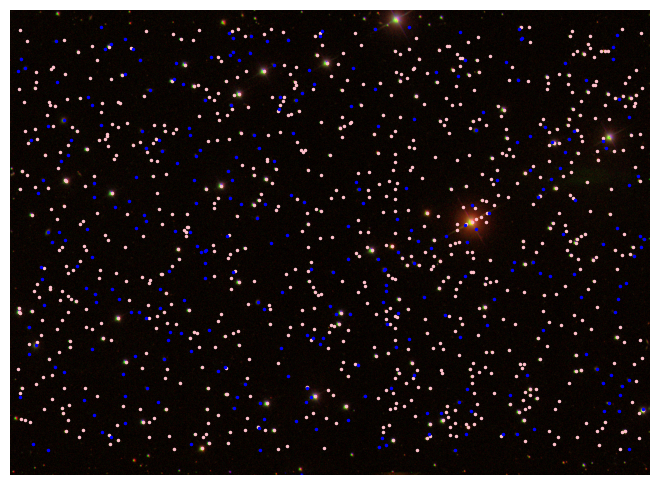

In [92]:
# Read in the three images downloaded from here:

for index in range(93, 93 + 1):
    g_name = fits.open(f'./data_align/frame-g-008162-6-0{index:03d}.fits', ext=0)
    r_name = fits.open(f'./data_align/frame-r-008162-6-0{index:03d}.fits', ext=0)
    i_name = fits.open(f'./data_align/frame-i-008162-6-0{index:03d}.fits', ext=0)

    wcs = WCS(r_name[0].header)

    g = g_name[0].data
    r = r_name[0].data
    i = i_name[0].data

    filename = f"data_align/{index}.jpg"

    rgb_default = make_lupton_rgb(i, r, g, Q=10, stretch=0.5, filename=filename)
    plt.figure()
    plt.axis("off")
    plt.subplots_adjust(left=0.0, right=1.0, top=1.0, bottom=0.0, wspace=0.0, hspace=0.0)
    plt.imshow(rgb_default, origin='lower')
    plt.plot(x_star,y_star,'o',color='pink',marker='.',markersize=3)
    plt.plot(x_gal,y_gal,'o',color='blue',marker='.',markersize=3)
